In [1]:
# LSTM with ID and timestamp as separate training model

# Importing necessary libraries
import os
import numpy as np
import pandas as pd
from utils import get_paths, read_traces, read_json, mapint2var, is_consistent

In [2]:
# Configuration
CODE = 'theft_protection'               ### application (code) theft_protection, mamba2, lora_ducy
BEHAVIOUR_FAULTY = 'faulty_data'        ### normal, faulty_data
BEHAVIOUR_NORMAL = 'normal'             ### normal, faulty_data
THREAD = 'single'                       ### single, multi
VER = 3                                 ### format of data collection

base_dir = './trace_data'              ### can be replaced with 'csv', 'exe_plot', 'histogram'
normalbase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_NORMAL}'
faultybase_path = base_dir+f'/{CODE}/{THREAD}_thread/version_{VER}/{BEHAVIOUR_FAULTY}'

print("Normal base path:", normalbase_path)
print("Faulty base path:", faultybase_path)

Normal base path: ./trace_data/theft_protection/single_thread/version_3/normal
Faulty base path: ./trace_data/theft_protection/single_thread/version_3/faulty_data


In [3]:
train_base_path = os.path.join(normalbase_path, 'train_data')
train_data_path = [os.path.join(train_base_path, x) for x in os.listdir(train_base_path)]
train_varlist_path = [os.path.join(normalbase_path, x) for x in os.listdir(normalbase_path) if 'varlist' in x]

######### get paths #######################
paths_log, paths_traces, varlist_path, paths_label = get_paths(faultybase_path)

train_data_path = [x for x in train_data_path if '.DS_Store' not in x]
train_varlist_path = [x for x in train_varlist_path if '.DS_Store' not in x]
paths_log = [x for x in paths_log if '.DS_Store' not in x]
paths_traces = [x for x in paths_traces if '.DS_Store' not in x]
varlist_path = [x for x in varlist_path if '.DS_Store' not in x]
paths_label = [x for x in paths_label if '.DS_Store' not in x]

paths_log.sort()
paths_traces.sort()
varlist_path.sort()
paths_label.sort()

test_data_path = paths_traces
test_label_path = paths_label

In [4]:
# Check consistency
if VER == 3:
    check_con, _ = is_consistent([train_varlist_path[0]] + varlist_path)
    if check_con:
        to_number = read_json(varlist_path[0])
        from_number = mapint2var(to_number)
    else:
        to_number = read_json(train_varlist_path[0])
        from_number = mapint2var(to_number)

sorted_keys = list(from_number.keys())
sorted_keys.sort()
var_list = [from_number[key] for key in sorted_keys]

varlist 1 is consistent with varlist 0
varlist 2 is consistent with varlist 0
varlist 3 is consistent with varlist 0


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Load training data ( Here changing for ID alone ignoring timestamp)
def load_data_separate_sequence(file_paths):
    id_data = []
    timestamp_data = []

    for file in file_paths:
        traces = read_traces(file)
        if isinstance(traces, list):
            id_sequence = [int(trace[0]) for trace in traces]
            timestamp_sequence = [int(trace[1]) for trace in traces]

            time_difference = []
            for i in range(1, len(timestamp_sequence)):
                difference = timestamp_sequence[i] - timestamp_sequence[i-1]
                time_difference.append(difference)


            new_id_sequence = id_sequence[1:]
            id_data.append(new_id_sequence)
            timestamp_data.append(time_difference)
            
    return id_data, timestamp_data
            

train_data_id, train_data_timestamp = load_data_separate_sequence(train_data_path)
print("train_data_id:", train_data_id)
print("train_data_timestamp:", train_data_timestamp)


# scaler = MinMaxScaler()
# train_data_flat = []
# for td in train_data:
#     train_data_flat.extend(td)

# train_data_flat = np.array(train_data_flat).reshape(1, -1)
# print(train_data_flat.shape)
# train_data_scaled = [scaler.fit_transform(np.array(td).reshape(1,-1)) for td in train_data]
# print(train_data_scaled)

train_data_id: [[1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15], [14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12

In [8]:
from sklearn.model_selection import train_test_split

# Prepare LSTM training data for ID and timestap separately

# For ID data
sequence_length = 10       
X_train_id, y_train_id = [], []
for single_file_data in train_data_id:
    for i in range(len(single_file_data) - sequence_length):
        X_train_id.append(single_file_data[i:i + sequence_length])
        y_train_id.append(single_file_data[i + sequence_length])

X_train_id, y_train_id = np.array(X_train_id), np.array(y_train_id)
X_train_id, X_val_id, y_train_id, y_val_id = train_test_split(X_train_id, y_train_id, test_size=0.2, random_state=42)




In [9]:
# Prepare LSTM training data for ID and timestap separately

# For timestamp data
X_train_time, y_train_time = [], []
for single_file_data in train_data_timestamp:
    for i in range(len(single_file_data) - sequence_length):
        X_train_time.append(single_file_data[i:i + sequence_length])
        y_train_time.append(single_file_data[i + sequence_length])

X_train_time, y_train_time = np.array(X_train_time), np.array(y_train_time)
X_train_time, X_val_time, y_train_time, y_val_time = train_test_split(X_train_time, y_train_time, test_size=0.2, random_state=42)


In [10]:
X_train_id.shape

(1452, 10)

In [11]:
X_train_time.shape

(1452, 10)

In [12]:
y_train_id.shape

(1452,)

In [13]:
y_train_time.shape

(1452,)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define LSTM model for IDs
def create_lstm_model(sequence_length):
    model = Sequential([
        LSTM(128, activation='relu', return_sequences=True, input_shape=(sequence_length, 1), kernel_regularizer=l2(0.01)),
        Dropout(0.1),
        LSTM(64, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)),
        Dropout(0.1),
        LSTM(32, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01)),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.1),
                  loss=tf.keras.losses.Huber(delta=1.0),
                  metrics=['mae'])
    
    return model

model_id = create_lstm_model(sequence_length)
model_time = create_lstm_model(sequence_length)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training ID alone
history_id = model_id.fit(X_train_id, y_train_id, validation_data=(X_val_id, y_val_id), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

# Training timestamp alone
history_time = model_time.fit(X_train_time, y_train_time, validation_data=(X_val_time, y_val_time), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 17255416.0000 - mae: 17255400.0000 - val_loss: 44.8876 - val_mae: 6.3706
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 79.1769 - mae: 40.7848 - val_loss: 39.3640 - val_mae: 2.1672
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 39.1133 - mae: 2.4371 - val_loss: 37.3041 - val_mae: 1.9838
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 36.9263 - mae: 1.9709 - val_loss: 35.9685 - val_mae: 1.9692
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 35.5940 - mae: 1.9042 - val_loss: 34.8451 - val_mae: 1.9667
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 35.2044 - mae: 1.9808 - val_loss: 34.7223 - val_mae: 1.9681
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 34.1962 - mae: 1.8265 - val_loss: 33.3934 - val_mae: 1.9805
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 32.9849 - mae: 1.8286 - val_loss: 32.4344 - val_mae: 1.9710
Epoch 9/100
46/46 ━━━━━━━━

In [ ]:
from anomaly_detection import test_single_id_timestamp, merge_detections, get_correct_detections_id_timestamp


## checking the detections against the ground truth
DIFF_VAL = 0
all_detections = []         # To store detections for each file
y_pred_all = []             # To store the predicted labels
y_true_all = []             # To store the ground truth labels
all_tp = []                 # To store all true positives
all_fp = []                 # To store all false positives
all_fn = []                 # To store all false negatives
all_gt = []                 # To store the ground truth



# Iterating through each test data file and label file
for test_data, test_label in zip(test_data_path, test_label_path):
    
    detection = test_single_id_timestamp(test_data, model_id,model_time, sequence_length)

    all_detections.append((test_data, detection, test_label))
    merge_detection = merge_detections(detection, diff_val=DIFF_VAL)
    
    ground_truth_raw = read_traces(test_label)                                               # read ground truth labels from the label file
    ground_truth = ground_truth_raw['labels']                                                # extract labels from dictionary from ground truth data

    label_trace_name = list(ground_truth.keys())[0]
    ground_truth = ground_truth[label_trace_name]
    correct_pred, rest_pred, y_pred, y_true, false_neg = get_correct_detections_id_timestamp(merge_detection, ground_truth)  # Comparing detected anomaly with ground truth
    y_pred_all.extend(y_pred)          # predicted labels
    y_true_all.extend(y_true)          # actual ground truth labels
    all_tp.append((test_data, correct_pred, test_label))
    all_fp.append((test_data, rest_pred, test_label))
    all_fn.append((test_data, false_neg, test_label))
    all_gt.append((test_data, ground_truth, test_label))

ID_Data before :  [[1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7, 8, 9, 6, 7, 8, 9, 6, 7, 8, 9, 10, 11, 12, 6, 7, 8, 9, 13, 14, 15, 6, 7,

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_all = np.array(y_pred_all)
y_true_all = np.array(y_true_all)

# Calculate evaluation metrics
precision = precision_score(y_true_all, y_pred_all)
recall = recall_score(y_true_all, y_pred_all)
f1 = f1_score(y_true_all, y_pred_all)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.0856
Recall: 0.5231
F1 Score: 0.1472


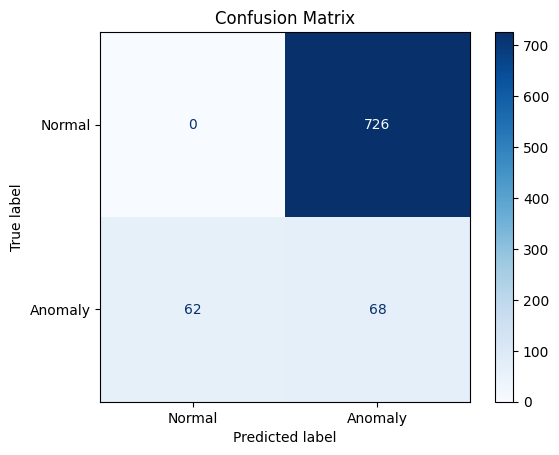

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_matrix = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Normal', 'Anomaly'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()